In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KAGGLE_USERNAME']='taarusshwadhwa'
os.environ['KAGGLE_KEY']='f2ef5c63de2d4d9d7d2f5b93735d0395'

In [3]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 97% 201M/207M [00:09<00:00, 35.1MB/s]
100% 207M/207M [00:09<00:00, 22.7MB/s]


In [4]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
validation_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir, 'Mask')
train_nomask_dir = os.path.join(train_dir, 'Non Mask')

In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0693.jpg', '1562.jpg', '1515.jpg', '1518.jpg', '1195.jpg', '1067.jpg', '0110.jpg', '0769.jpg', '0639.jpg', '1040.jpg']
['340.jpg', '253.jpg', '240.jpg', '351.jpg', '130.jpg', '151.jpg', '223.jpg', '97.jpg', '218.jpg', '329.jpg']


['/content/New Masks Dataset/Train/Mask/0693.jpg', '/content/New Masks Dataset/Train/Mask/1562.jpg', '/content/New Masks Dataset/Train/Mask/1515.jpg', '/content/New Masks Dataset/Train/Mask/1518.jpg', '/content/New Masks Dataset/Train/Mask/1195.jpg', '/content/New Masks Dataset/Train/Mask/1067.jpg', '/content/New Masks Dataset/Train/Mask/0110.jpg', '/content/New Masks Dataset/Train/Mask/0769.jpg']
['/content/New Masks Dataset/Train/Non Mask/340.jpg', '/content/New Masks Dataset/Train/Non Mask/253.jpg', '/content/New Masks Dataset/Train/Non Mask/240.jpg', '/content/New Masks Dataset/Train/Non Mask/351.jpg', '/content/New Masks Dataset/Train/Non Mask/130.jpg', '/content/New Masks Dataset/Train/Non Mask/151.jpg', '/content/New Masks Dataset/Train/Non Mask/223.jpg', '/content/New Masks Dataset/Train/Non Mask/97.jpg']


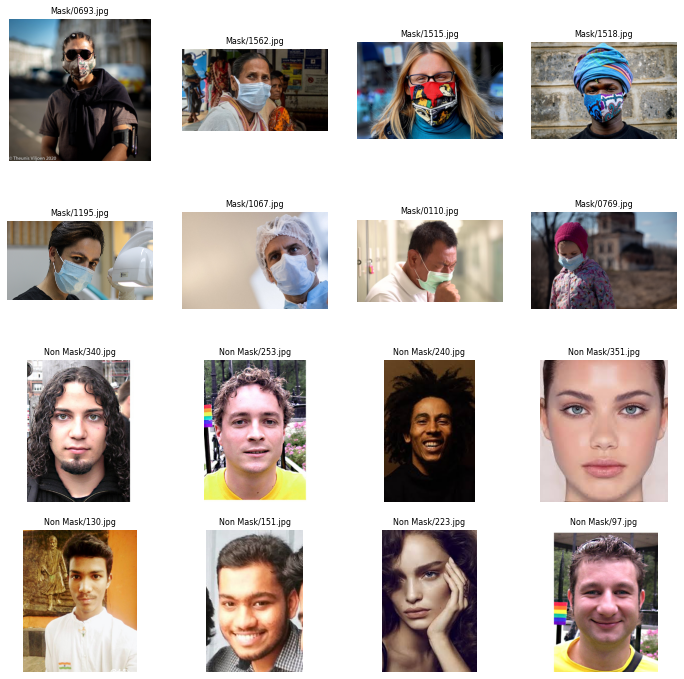

In [7]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic=[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic=[]
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic + nomask_pic

for i in range(0, len(merged_list)):
  data = merged_list[i].split('/', 4)[4]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data, fontsize=8)
  plt.imshow(image, cmap='Blues')

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )

val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary'
                                                    )

val_generator = val_datagen.flow_from_directory(validation_dir,
                                                target_size=(150,150),
                                                batch_size=32,
                                                class_mode='binary'
                                                )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='SAME', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [11]:
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_generator, 
                    epochs = 30,
                    validation_data = val_generator)

Epoch 1/30
19/19 [==============================] - 14s 750ms/step - loss: 3.8265 - accuracy: 0.4850 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 2/30
19/19 [==============================] - 13s 699ms/step - loss: 0.6913 - accuracy: 0.5600 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 3/30
19/19 [==============================] - 13s 705ms/step - loss: 0.6544 - accuracy: 0.6333 - val_loss: 0.6683 - val_accuracy: 0.6601
Epoch 4/30
19/19 [==============================] - 14s 721ms/step - loss: 0.5140 - accuracy: 0.7667 - val_loss: 0.5301 - val_accuracy: 0.7778
Epoch 5/30
19/19 [==============================] - 14s 716ms/step - loss: 0.3902 - accuracy: 0.8417 - val_loss: 0.3477 - val_accuracy: 0.8922
Epoch 6/30
19/19 [==============================] - 14s 712ms/step - loss: 0.3735 - accuracy: 0.8667 - val_loss: 0.3518 - val_accuracy: 0.8693
Epoch 7/30
19/19 [==============================] - 13s 710ms/step - loss: 0.3184 - accuracy: 0.8917 - val_loss: 0.3438 - val_accuracy: 0.8562

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

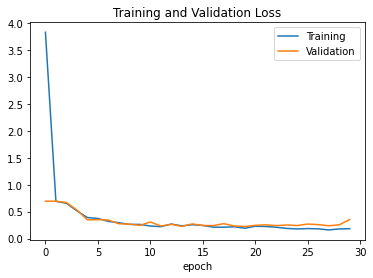

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

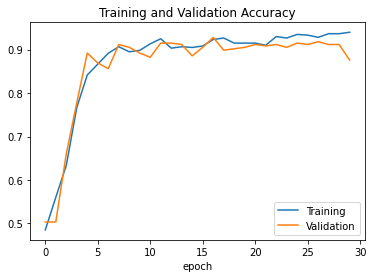

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

In [16]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('test loss:{} test accuracy:{}'.format(test_loss, test_accuracy))

4/4 [==============================] - 1s 261ms/step - loss: 0.3738 - accuracy: 0.8300
test loss:0.3738428056240082 test accuracy:0.8299999833106995


In [18]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path, target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('Mask!')
  else:
    print('No Mask!')

Saving nomask.jpeg to nomask (1).jpeg
Saving mask_2.jpg to mask_2 (1).jpg
Saving mask_1.jpg to mask_1 (1).jpg
nomask.jpeg
No Mask!
mask_2.jpg
Mask!
mask_1.jpg
Mask!
